In [7]:
import requests
url = 'https://drive.google.com/open?id=0B3gersZ2cHIxVFI1Rjd5aDgwOG8'
r = requests.get(url, allow_redirects=True)
open('mobilenet_iter_73000.caffemodel', 'wb').write(r.content)


72658

In [8]:
# pip install numpy
# pip install argparse
# pip intall cv2

In [12]:
import numpy as np
import argparse
import cv2
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-p", "--prototxt", required=True,
	help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True,
	help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.2,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args(['-i/content/img.jpg','-p/content/deploy.prototxt','-m/content/mobilenet_iter_73000.caffemodel']))

In [13]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [14]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

[INFO] loading model...


In [15]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,
	(300, 300), 127.5)

In [16]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [17]:
for i in np.arange(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# extract the index of the class label from the `detections`,
		# then compute the (x, y)-coordinates of the bounding box for
		# the object
		idx = int(detections[0, 0, i, 1])
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction
		label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		print("[INFO] {}".format(label))
		cv2.rectangle(image, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(image, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 2, COLORS[idx], 2)

[INFO] bicycle: 93.77%
[INFO] bicycle: 66.13%
[INFO] bicycle: 27.20%
[INFO] bus: 34.67%
[INFO] car: 92.51%
[INFO] car: 75.40%
[INFO] car: 27.03%
[INFO] person: 77.94%
[INFO] person: 58.30%
[INFO] person: 44.54%
[INFO] person: 41.09%
[INFO] person: 28.88%
[INFO] person: 26.51%


In [18]:
 from google.colab.patches import cv2_imshow

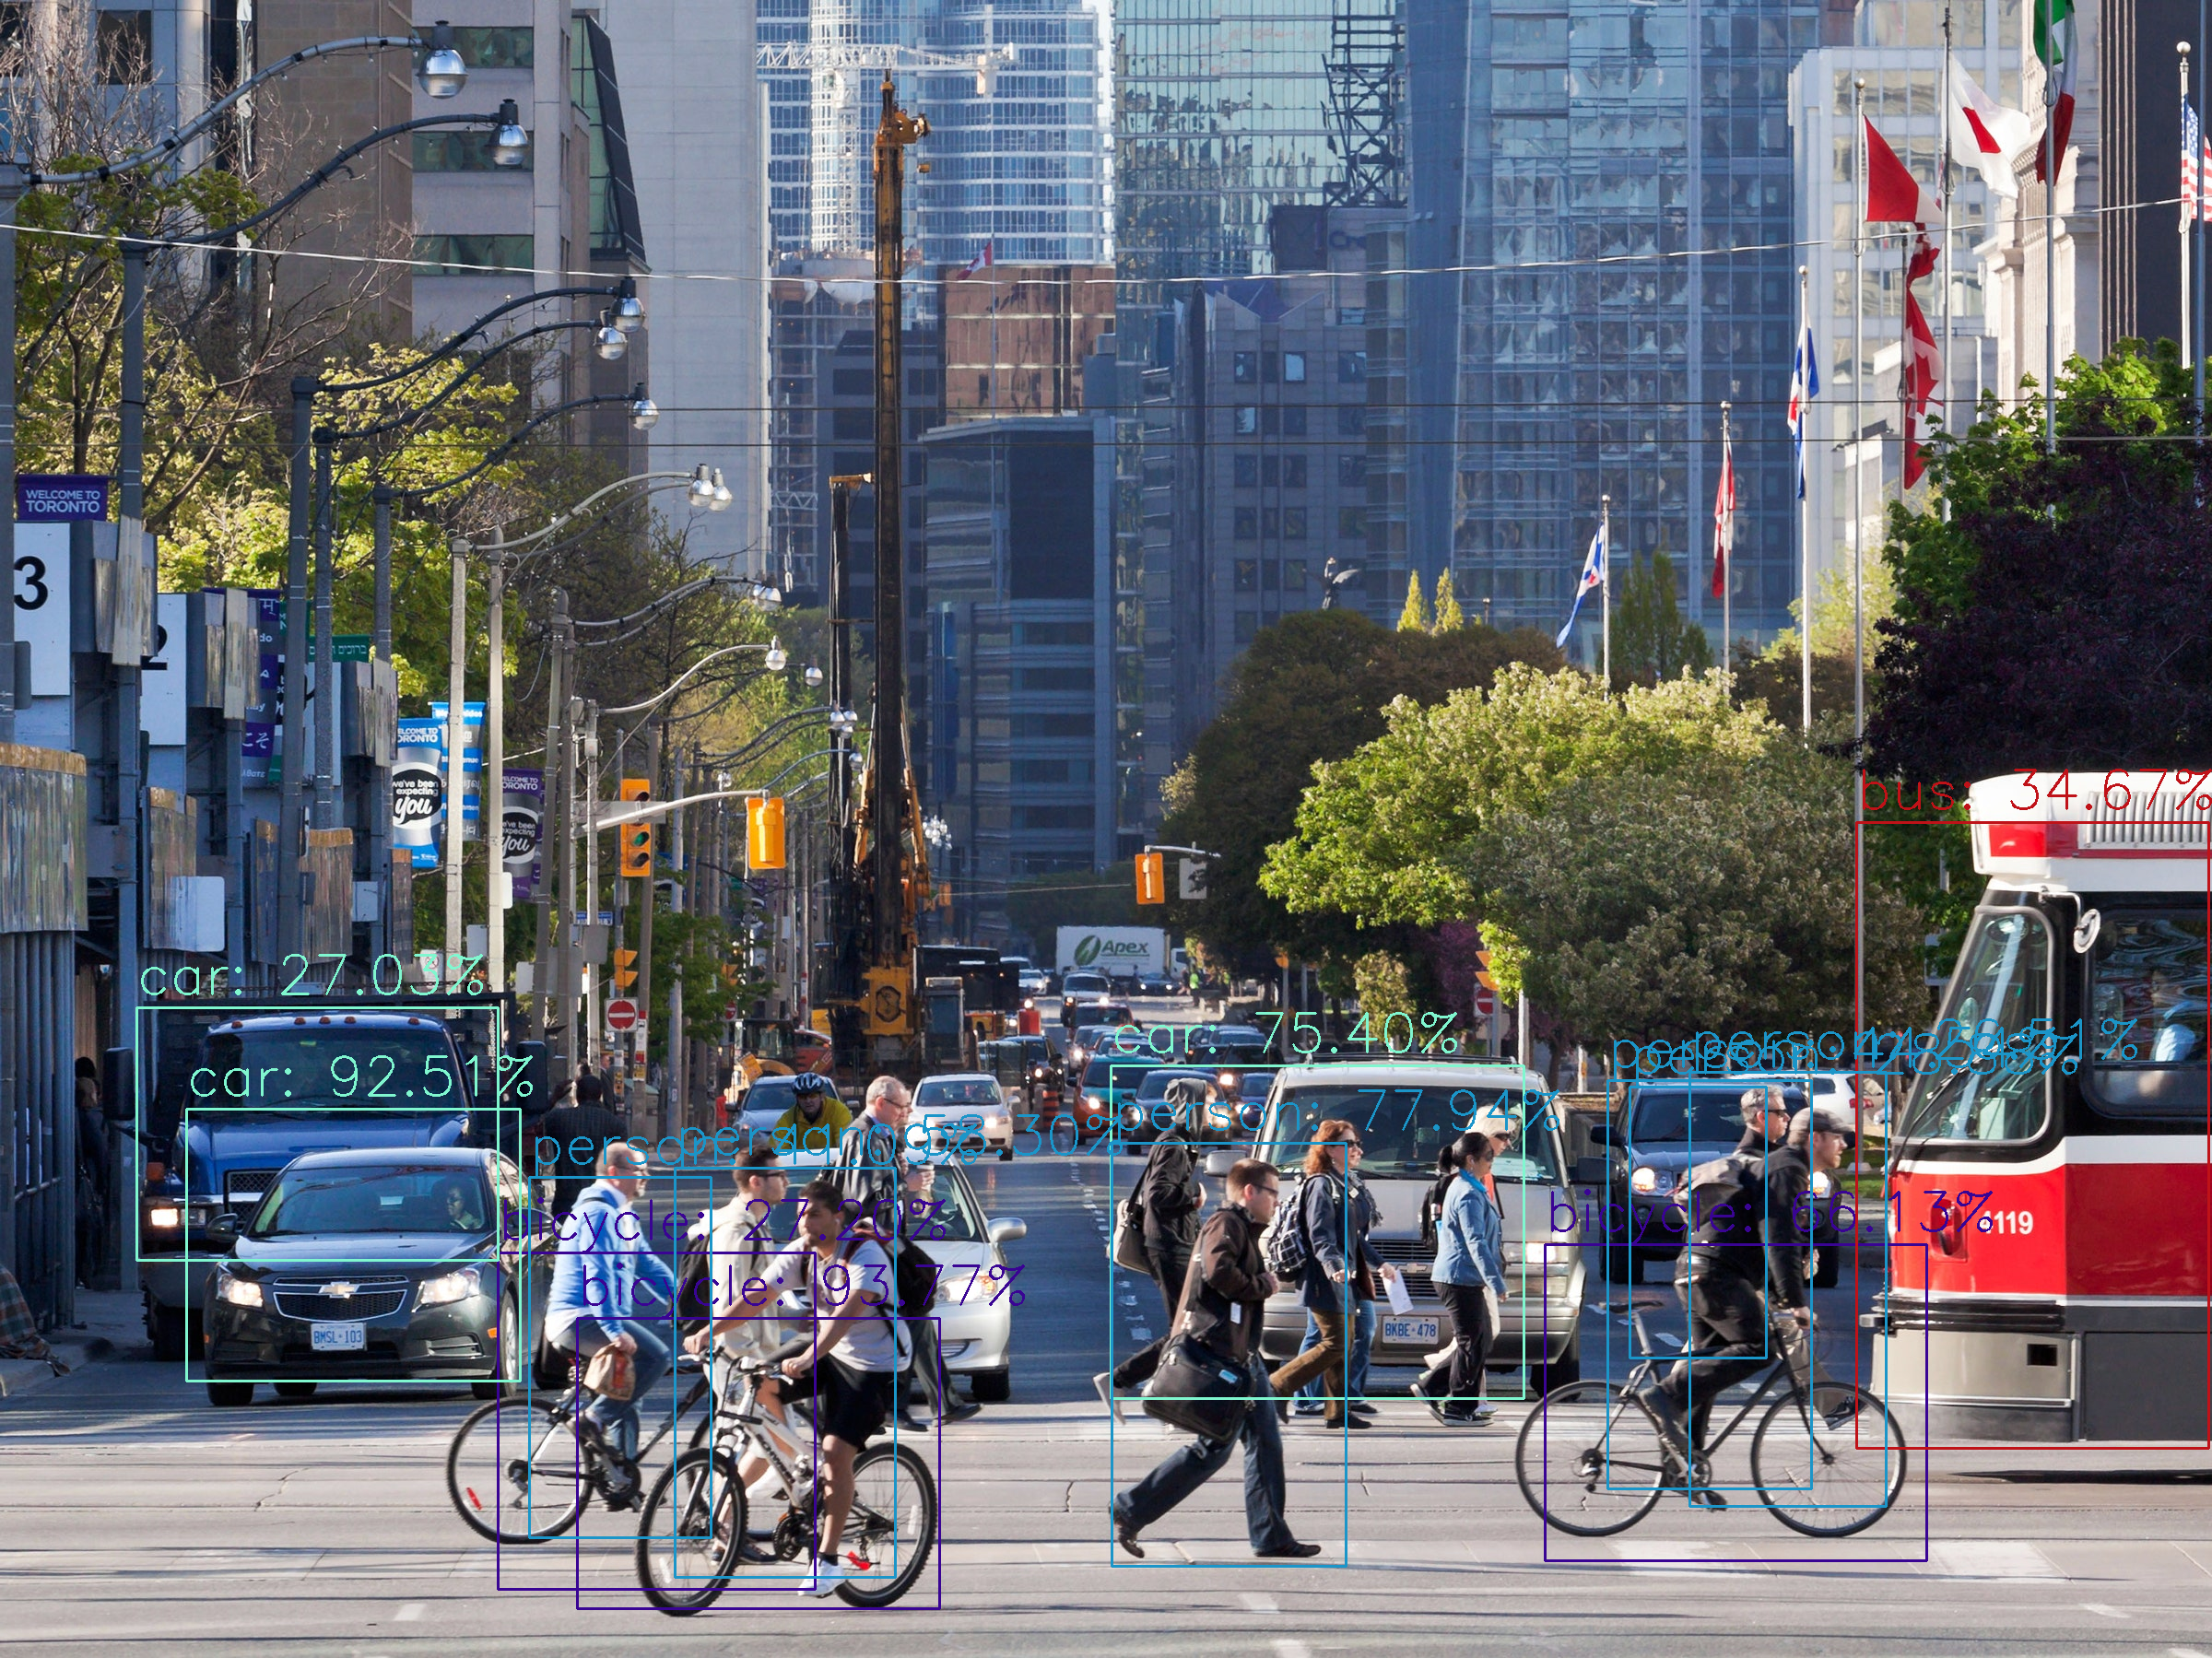

-1

In [19]:
cv2_imshow(image)
cv2.waitKey(0)